## ACTIVIDAD 5: USO DE SOFTWARE PARA BÚSQUEDA
EQUIPO 6

HORA CLASE: MARTES N4, N5, N6

Integrantes:

Jared Jesus Diaz Juarez 2077828

Rolando Vera Domínguez 2005010

Daniel Alberto Silva Moreno 1868223

Maria Fernanda Campos Carrazco 2015715

Alberto Gómez Vázquez 1996158

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.15.0


In [2]:
mnist = tf.keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
class_names = ['cero', 'uno', 'dos', 'tres', 'cuatro',
               'cinco', 'seis', 'siete', 'ocho', 'nueve']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

Procesar los datos

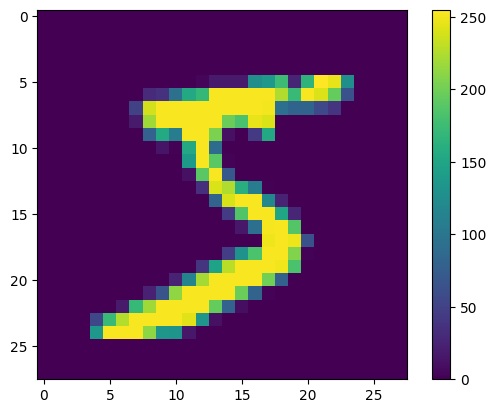

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
train_images = train_images / 255.0

test_images = test_images / 255.0

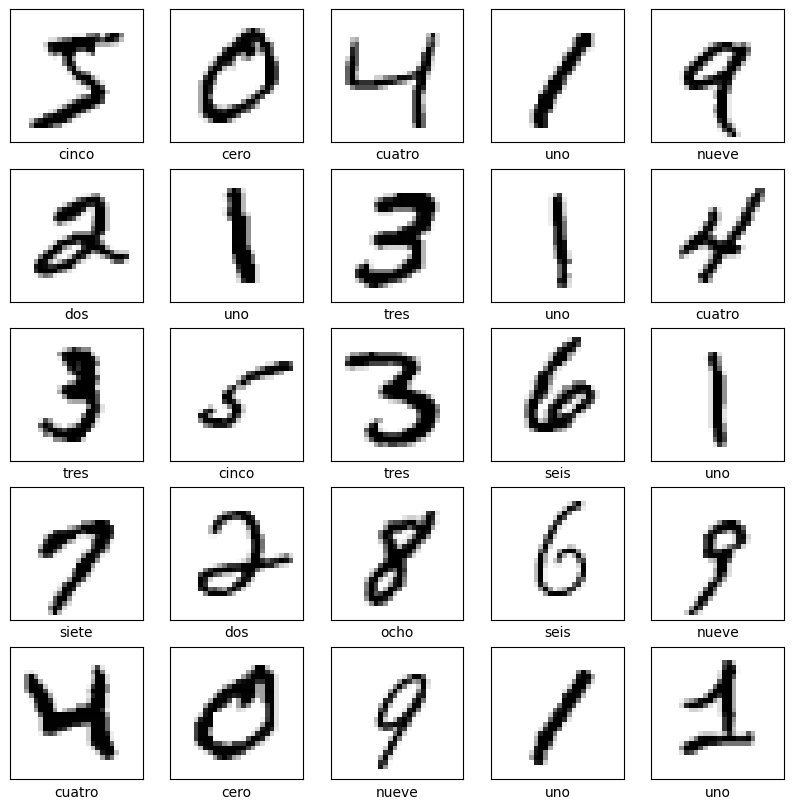

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

Compilar el modelo

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Entrenamiento

In [14]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2583 - accuracy: 0.9266
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1135 - accuracy: 0.9665
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0774 - accuracy: 0.9768
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0584 - accuracy: 0.9818
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0457 - accuracy: 0.9858
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0361 - accuracy: 0.9889
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0271 - accuracy: 0.9919
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0237 - accuracy: 0.9924
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0191 - accuracy: 0.9942
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.015

In [15]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.0758 - accuracy: 0.9793 - 715ms/epoch - 2ms/step

Test accuracy: 0.9793000221252441


In [16]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [17]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [18]:
predictions[0]

array([2.3785385e-09, 1.0892893e-14, 3.6228902e-09, 3.9086956e-07,
       4.5862518e-15, 1.2166582e-10, 4.7794306e-18, 9.9999946e-01,
       3.3323151e-09, 7.3426875e-08], dtype=float32)

In [19]:
np.argmax(predictions[0])

7

In [20]:
test_labels[0]

7

In [21]:
np.argmax(predictions[10])

0

In [22]:
test_labels[10]

0

In [23]:
np.argmax(predictions[75])

7

In [24]:
test_labels[75]

7

In [25]:
np.argmax(predictions[1656])

2

In [26]:
test_labels[1656]

2

In [27]:
np.argmax(predictions[-1])

6

In [28]:
test_labels[-1]

6

In [29]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

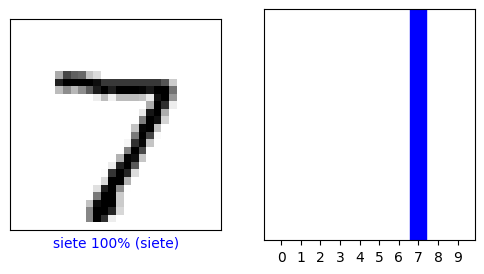

In [30]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

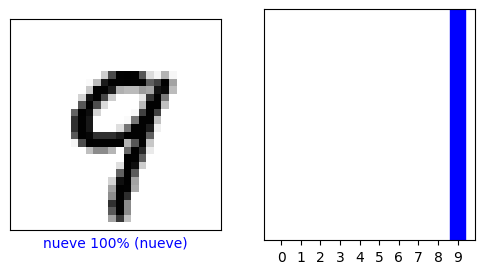

In [31]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

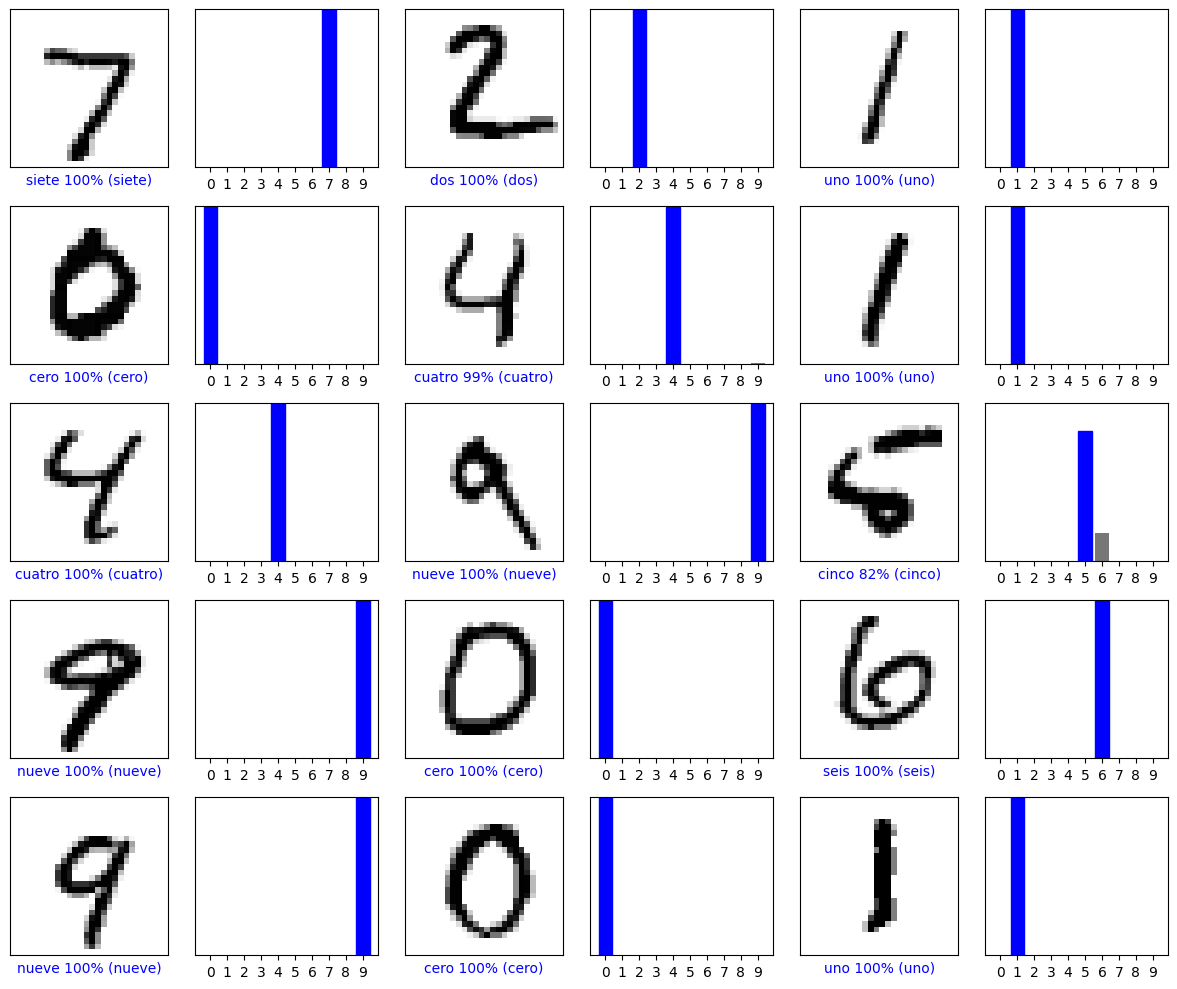

In [32]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [33]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [34]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [35]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 21ms/step
[[4.7034349e-13 6.8950314e-08 9.9999988e-01 8.8120986e-09 9.3340136e-23
  8.3519430e-10 1.2743522e-10 3.9296845e-18 9.1130232e-09 4.0226881e-19]]


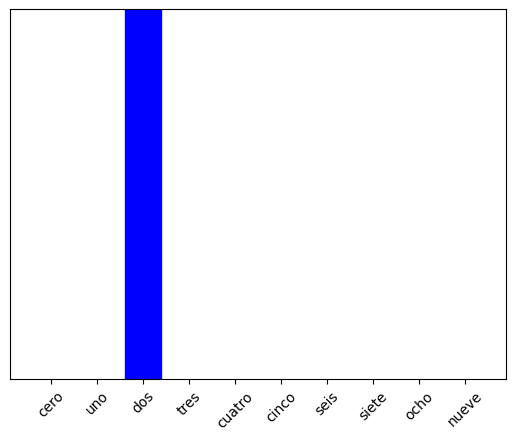

In [36]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [37]:
np.argmax(predictions_single[0])

2